In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#| default_exp pct_examples

In [ ]:
#| export
import json
import matplotlib.pyplot as plt
import networkx as nx



In [ ]:
#| export
from pct.hierarchy import PCTHierarchy

## PCTExamples Class

The `PCTExamples` class is designed to load a PCTHierarchy configuration file and provide various methods to interact with the hierarchy.

In [ ]:
#| export
class PCTExamples:
    """
    PCTExamples class provides methods to load a PCT hierarchy from a configuration file, 
    summarize the hierarchy, get the configuration, draw the hierarchy, run the hierarchy 
    for a specified number of steps, and close the environment.
    Attributes:
        hierarchy (PCTHierarchy): The loaded PCT hierarchy.
        env (Environment): The environment associated with the PCT hierarchy.
    """

    def __init__(self, config_file, min=True, early_termination=False, history=False):
        """
        Initializes the PCTExamples instance by loading the hierarchy from the given configuration file.
        """
        self.hierarchy, self.env = PCTHierarchy.load_from_file(config_file, min=min, early_termination=early_termination, history=history)
        self.history_data = None
        self.history = history

    def summary(self):
        """
        Prints a summary of the hierarchy.
        """
        self.hierarchy.summary()

    def get_config(self):
        """
        Returns the configuration of the hierarchy.
        """
        return self.hierarchy.get_config()

    def draw(self, with_labels=True, with_edge_labels=False, font_size=12, font_weight='bold', font_color='black', 
                       color_mapping={'PL':'aqua','OL':'limegreen','CL':'goldenrod', 'RL':'red', 'I':'silver', 'A':'yellow'},
                       node_size=500, arrowsize=25, align='horizontal', file=None, figsize=(8,8), move={}, draw_fig=True,
                       node_color=None, layout={'r':2,'c':1,'p':2, 'o':0}, funcdata=False, interactive_mode=False, experiment=None):
        """
        Draws the hierarchy with the specified parameters and returns the figure.
        """
        fig = self.hierarchy.draw(with_labels, with_edge_labels, font_size, font_weight, font_color, color_mapping, node_size, 
                            arrowsize, align, file, figsize, move, draw_fig, node_color, layout, funcdata, interactive_mode, experiment)
        
        return fig

    def run(self, steps=1, verbose=False, render=False):
        """
        Runs the hierarchy for the specified number of steps and returns the result.
        """
        self.hierarchy.get_preprocessor()[0].set_render(render)
        return self.hierarchy.run(steps, verbose)
    
    def close(self):
        """
        Closes the environment.
        """
        self.env.close()

    def get_history_keys(self):
        """
        Returns the keys of the history data of the hierarchy.
        """
        if self.history :
            if self.history_data is None:
                self.history_data = self.hierarchy.get_history_data()
            return list(self.history_data.keys())
        else:
            print("History is not enabled")

        return None

    def set_history_data(self):
        """
        Sets the history data of the hierarchy.
        """
        if self.history :

            if self.history_data is None:
                self.history_data = self.hierarchy.get_history_data()

            return self.history_data
        else:
            print("History is not enabled")

        return None

                
    
    def plot_history(self, plots=None, title_prefix='', plots_dir=None, plots_figsize=(12, 6), history_data=None):
        """
        Plots the history of the hierarchy.
        """
        print(plots)
        plots = self.hierarchy.get_plots_config(plots, title_prefix)
        print(plots)

        from os import sep
        for plot in plots:
            print(plot)
            plotfile=None
            if plots_dir:
                plotfile = plots_dir + sep + plot['title'] + '-' + str(self.hierarchy.get_namespace()) + '.png'
            fig = self.hierarchy.hierarchy_plots(title=plot['title'], plot_items=plot['plot_items'], figsize=plots_figsize, file=plotfile, history=history_data)
            # import matplotlib.pyplot as plt
            # plt.close(fig)  # Close the figure here
    
        return fig
    
    def plot_single(self, plot=None, title_prefix='', plots_dir=None, plots_figsize=(12, 6), history_data=None):
        """
        Plot one item of the history of the hierarchy.
        """

        from os import sep

        plotfile=None
        if plots_dir:
            plotfile = plots_dir + sep + plot['title'] + '-' + str(self.hierarchy.get_namespace()) + '.png'
        fig = self.hierarchy.hierarchy_plots(title=plot['title'], plot_items=plot['plot_items'], figsize=plots_figsize, file=plotfile, history=history_data)
            # import matplotlib.pyplot as plt
            # plt.close(fig)  # Close the figure here
    
        return fig
    

    

**************************
pcthierarchy PCTHierarchy [1, 2, 3, 2] 8a74d3b4-be2b-11ef-8c8b-8cf8c5b8669e
--------------------------
PRE: WindTurbine WindTurbine | 0 | links  Action1sgsm 
IYE IndexedParameter | index 1 | -0.0 | links  WindTurbine 
IWD IndexedParameter | index 2 | 0.0 | links  WindTurbine 
IWS IndexedParameter | index 4 | 0.0 | links  WindTurbine 
Level 0 Cols 1
L0C0 PCTNode 8a74d3b4-be2b-11ef-8c8b-8cf8c5b8669e
----------------------------
REF: RL0C0sm SmoothWeightedSum | weights [0.54, -0.3] smooth 0.38 | -0.0 | links  OL1C0sm OL1C1sm 
PER: PL0C0sm SmoothWeightedSum | weights [-1.56, -0.12, 0.6] smooth 0.45 | 0.0 | links  IYE IWD IWS 
COM: CL0C0 Subtract | -0.0 | links  RL0C0sm PL0C0sm 
OUT: OL0C0sm SmoothWeightedSum | weights [-0.11] smooth 0.44 | 0.0 | links  CL0C0 
----------------------------
Level 1 Cols 2
L1C0 PCTNode 8a74d3b4-be2b-11ef-8c8b-8cf8c5b8669e
----------------------------
REF: RL1C0sm SmoothWeightedSum | weights [0.03, 0.87, 0.37] smooth 0.70 | 0.0 | link

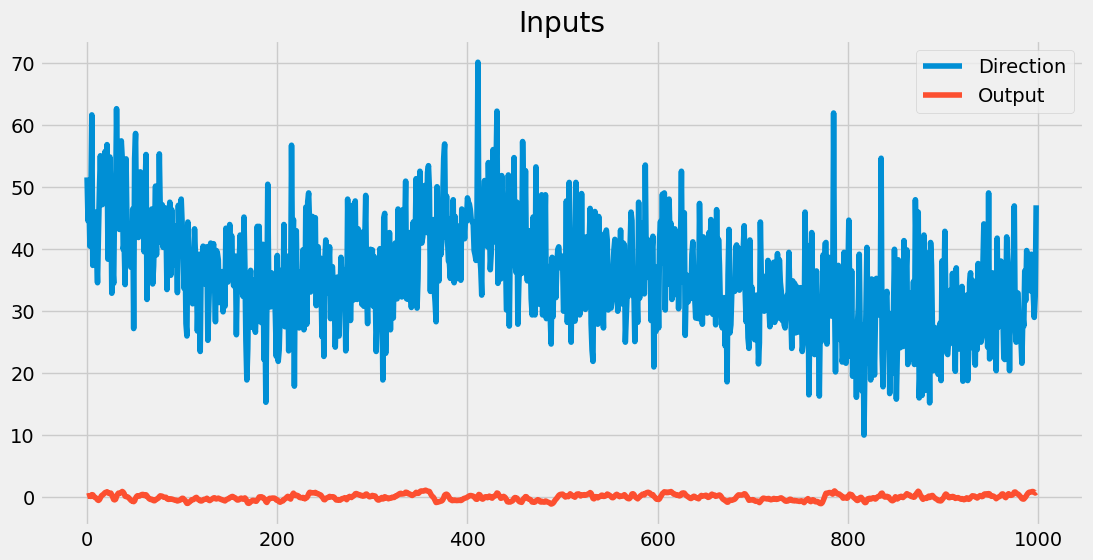

In [ ]:
#| gui
# Example of how to use the PCTExamples class
pct = PCTExamples('testfiles/WindTurbine/ga--1362.401-s003-4x3-m005-WT0538-bddf277b0f729cc630efacf91b9f494f.properties', history=True)
pct.summary()
pct.run(1000)
print(pct.get_history_keys())
history_data = pct.set_history_data()
fig = pct.plot_single(plot={'plot_items': {'IWD': 'Direction', 'Action1sgsm': 'Output'}, 'title': 'Inputs'}, history_data=history_data)
                


In [ ]:
#| gui
# pct.draw( figsize=(10,10), font_size=6, funcdata=True, with_edge_labels=True, node_size=200)


In [ ]:
#| gui
# Example of how to use the PCTExamples class
pct = PCTExamples('testfiles/MountainCar/ga-000.331-s032-2x2-m004-cdf7cc1497ad143c0b04a3d9e72ab783.properties', early_termination=True, history=True)
# pct.summary()
pct.run(steps=500, render=True)
pct.close()





['MountainCarContinuousV0', 'reward', 'IP', 'IV', 'Action1', 'RL0C0', 'PL0C0', 'CL0C0', 'OL0C0', 'RL0C1', 'PL0C1', 'CL0C1', 'OL0C1', 'RL1C0', 'PL1C0', 'CL1C0', 'OL1C0']


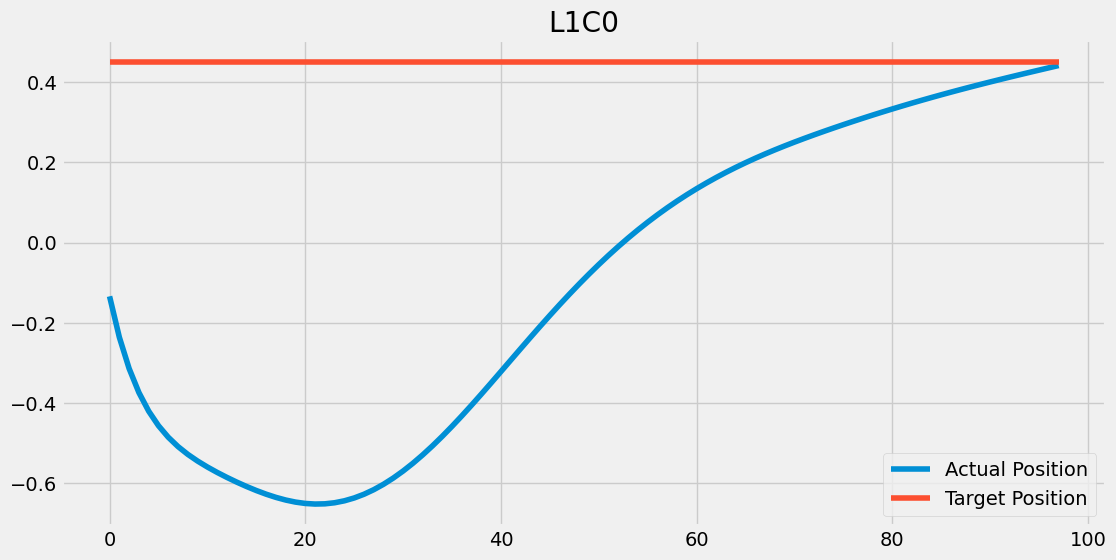

In [ ]:
#| gui
print(pct.get_history_keys())
history_data = pct.set_history_data()
# pct.plot_history(plots='scEdges', title_prefix='')
fig = pct.plot_single(plot= {'plot_items': {'PL1C0': 'Actual Position', 'RL1C0': 'Target Position'}, 'title': 'L1C0'}, history_data=history_data)



In [ ]:

# pct.draw( figsize=(10,10), font_size=6, funcdata=True, with_edge_labels=True, node_size=200)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()